# Minimal example : run ComSeg with a config dictionary

In this tutorial we present a simplify way to use ComSeg  
Download the test data for this tutorail at https://cloud.minesparis.psl.eu/index.php/s/HtYucchv9OGg6JN

In [1]:
import sys
sys.path  = ['/snap/pycharm-professional/391/plugins/python/helpers/pydev',
 '/snap/pycharm-professional/391/plugins/python/helpers/third_party/thriftpy',
 '/snap/pycharm-professional/391/plugins/python/helpers/pydev',
 '/snap/pycharm-professional/391/plugins/python/helpers/pycharm_display',
 '/home/tom/anaconda3/envs/comseg_v0/lib/python38.zip',
 '/home/tom/anaconda3/envs/comseg_v0/lib/python3.8',
 '/home/tom/anaconda3/envs/comseg_v0/lib/python3.8/lib-dynload',
 '',
 '/home/tom/.local/lib/python3.8/site-packages',
 '/home/tom/Bureau/phd/st_seg/ssam_merfish/ssam_pkg',
 '/home/tom/anaconda3/envs/comseg_v0/lib/python3.8/site-packages',
 '/snap/pycharm-professional/391/plugins/python/helpers/pycharm_matplotlib_backend',
 '/home/tom/Bureau/phd/simulation/ComSeg_pkg',
 '/home/tom/Bureau/phd/simulation/ComSeg_pkg/src']

In [2]:
import pandas as pd
import matplotlib
import comseg
import numpy as np
import random
import tifffile
import importlib
from comseg import dataset as ds
from comseg import dictionary
import scanpy
%matplotlib inline
import importlib
from pathlib import Path

/home/tom/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Parameters for ComSeg can be gathered in a single configuration dictionary. Below we give a minimal example of configuration dictionary ```config```. A comprehensive and documented version of this config dictionary is detailed at the end of this tutorial.

Except for class instantiation, ComSeg functions accept a configuration dictionary as their sole argument. The values in ```config``` will override default values or any other provided arguments.  


In [6]:
#### HYPERPARAMETER ####
MEAN_CELL_DIAMETER = 15  # in micrometer
MAX_CELL_RADIUS = 50  # in micrometer
#########################

## here we present an extensive example of how to run ComSeg with 


path_dataset_folder = "/home/tom/Bureau/test_set_tutorial_comseg/small_df"
path_to_mask_prior = "/home/tom/Bureau/test_set_tutorial_comseg/mask"


config = {
    ### dataset initialisation
    "dict_scale" : {"x": 0.103, 'y': 0.103, "z": 0.3},
    "mean_cell_diameter" : MEAN_CELL_DIAMETER,
    "gene_column" : "gene",
    ### prior computation (if not already availble in external csv file)
    "prior_name":'in_nucleus',
    "overwrite":True,
    "compute_centroid":True,
    "max_cell_radius": MAX_CELL_RADIUS,
    ### final result 
    "alpha" :  0.5,
    "min_rna_per_cell" : 5,
    "allow_disconnected_polygon":True
    }

### Run ComSeg with configuration dictionary.

In [7]:
dataset = ds.ComSegDataset(
    path_dataset_folder=path_dataset_folder,
    dict_scale=config["dict_scale"],
    mean_cell_diameter=config["mean_cell_diameter"],
    gene_column=config["gene_column"],
    path_to_mask_prior=path_to_mask_prior
)

## if not already in the csv file 
dataset.add_prior_from_mask(config=config)
dict_proba_edge, count_matrix = dataset.compute_edge_weight(config=config)

Comsegdict = dictionary.ComSegDict(
    dataset=dataset,
    mean_cell_diameter=config["mean_cell_diameter"],
    prior_name=config["prior_name"],
)

Comsegdict.run_all(config=config)
anndata_comseg, json_dict = Comsegdict.anndata_from_comseg_result(
config=config
)

add 07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_006
add 07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_004
config dict overwritting default parameters
add prior to 07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_006
prior added to 07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_006 and saved in csv file
dict_centroid added for 07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_006 
add prior to 07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_004
prior added to 07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_004 and saved in csv file
dict_centroid added for 07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_004 


  0%|                                                                                                                                                                                                                                                                                                                                                                                                                                                             | 0/2 [00:00<?, ?it/s]

image name :  07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_006


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                                          | 1/2 [00:04<00:04,  4.55s/it]

image name :  07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_004


  0%|                                                                                                                                                                                                                                                                                                                                                                                                                                                             | 0/2 [00:00<?, ?it/s]

improvement of modularity 0.5103556712630646
improvement of modularity 0.1284543920217448
improvement of modularity 0.028574275330326637
improvement of modularity 0.0013733839513578872


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                                          | 1/2 [00:06<00:06,  6.55s/it]

improvement of modularity 0.5107168983464818
improvement of modularity 0.1274489318199452
improvement of modularity 0.0332000260688502
improvement of modularity 0.0032029031434113175


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:14<00:00,  7.18s/it]
/home/tom/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/tom/Bureau/phd/simulation/ComSeg_pkg/src/comseg/clustering.py:292: UserWarning: param_sctransform is none, expression vector are not normalized
  warnings.warn('param_sctransform is none, expression vector are not normalized')


number of cluster 8
number of cluster after merging 8


  0%|                                                                                                                                                                                                                                                                                                                                                                                                                                                             | 0/2 [00:00<?, ?it/s]

07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_006


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                                          | 1/2 [00:02<00:02,  2.60s/it]

07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_004


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.78s/it]


config dict overwritting the default parameters


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.68s/it]


In [8]:
anndata_comseg

AnnData object with n_obs × n_vars = 77 × 13
    obs: 'CellID', 'Name', 'centroid_z', 'centroid_y', 'centroid_x', 'image_name'
    var: 'features'
    uns: 'df_spots'

### Plot result

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': 'cell_index_pred'}>)

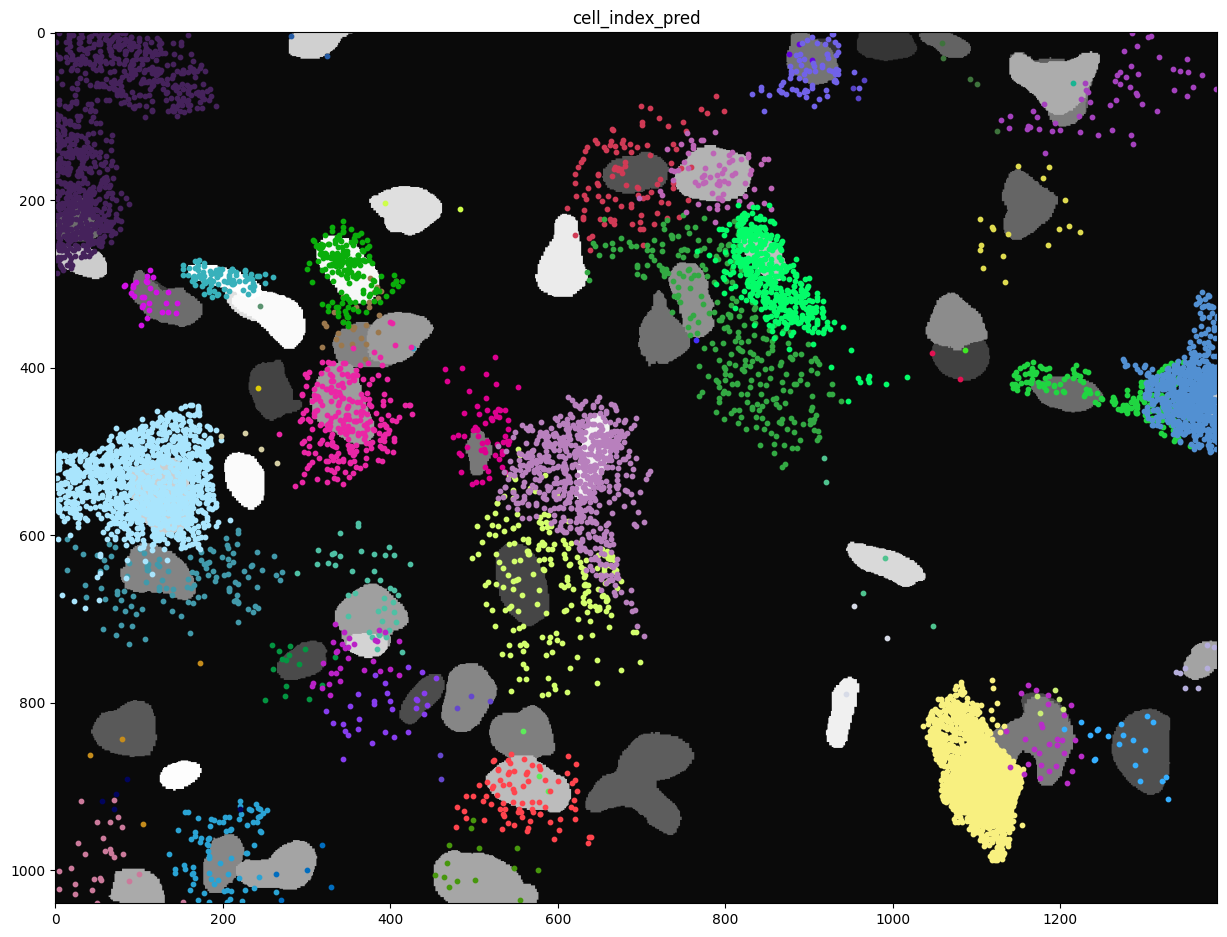

In [9]:
from comseg.utils import plot 
img_name = "07_CtrlNI_Pdgfra-Cy3_Serpine1-Cy5_006"
G = Comsegdict[img_name].G
nuclei = tifffile.imread(
    path_to_mask_prior + f'/{img_name}.tiff')

plot.plot_result(G=G,
            nuclei = nuclei,
               key_node = 'cell_index_pred',
                title = None,
                dico_cell_color = None,
                figsize=(15, 15),
                spots_size = 10,
                plot_outlier = False)

### Comprensive description of the configuration dictionnary

In [10]:
config = {
    ### dataset initialisation
    "dict_scale" : {"x": 0.103, 'y': 0.103, "z": 0.3},
    "mean_cell_diameter" : MEAN_CELL_DIAMETER,
    "gene_column" : "gene",
    ### prior computation 
    "prior_name":'in_nucleus',
    "overwrite":True,
    "compute_centroid":True,
    ### CO-EXPRESSION COMPUTATION
    "n_neighbors" : 40,
    "sampling" : True,
    "sampling_size": 10000,    
    ### KNN GRPAH 
    'k_nearest_neighbors': 10,
    'prior_name' : 'in_nucleus',
    ### IN SITU CLUSTERING
    'size_commu_min': 3,
    'norm_vector': True,
    'n_pcs': 4,
    'clustering_method': 'leiden',
    'n_neighbors': 20,
    'resolution': 1,
    'n_clusters_kmeans': 5,
    'nb_min_cluster': 1,
    'min_merge_correlation': 0.9,
    # RNA ASSIGMENT
    "max_cell_radius": MAX_CELL_RADIUS,
    ### final result 
    "return_polygon":False,
    "allow_disconnected_polygon" : False,
    "alpha" :  0.5,
    "min_rna_per_cell" : 5,
    }

#### dataset initialisation
- ```dict_scale``` : dictionary containing the pixel/voxel size of the images in µm, default is {"x": 0.103, 'y': 0.103, "z": 0.3}. Use to convert the detected spots coordinates in µm. 
- ```mean_cell_diameter```: the expected mean cell diameter in µm default is 15µm
- ```gene_column``` : name of the column containing the gene name in the csv files
#### computation of prior from segmentation
- ```prior_name``` : name of the column to add in the csv files containing the prior label of each spot when computing prior from .tiff segmentation file
- ```overwrite``` 
- ```compute_centroid```: if True, compute the centroid of each cell/nucleus in .tiff segmentation mask to use it for RNA-cell association

#### Co-expression computation
- ```n_neighbors``` : maximum number of neighbors default is 40
- ```sampling```  : if True, sample the dataset to compute the co-expression weigth
- ```sampling_size```:if sampling is True : number of proximity weighted expression vector to sample

#### knn graph generation 
- ``k_nearest_neighbors``: number of nearest neighbors to consider for the KNN graph creation, reduce K to speed computation
        :type k_nearest_neighbors: int

#### in-situ clustering 
- `size_commu_min`: This parameter is the minimum number of RNA in a community to be considered for the clustering (default is 3). It is of type `int`.
- `norm_vector`: If set to True, the expression vector will be normalized using the scTRANSFORM normalization parameters. The normalization requires the following R packages: sctransform, feather, arrow. The normalization is important to do on a dataset with a high number of genes. It is of type `bool`.
- `n_pcs`: This parameter is the number of principal components to compute for the clustering of the RNA communities expression vector. Set to 0 if no PCA is required. It is of type `int`.
- `clustering_method`: This parameter is used to choose the clustering method. Options include "leiden", "kmeans", "louvain". It is of type `str`.
- `n_neighbors`: This parameter is the number of neighbors similarity graph of the RNA communities expression vector clustering. It is of type `int`.
- `resolution`: This parameter is the resolution parameter for the in-situ-clustering step if louvain or leiden are used. It is of type `float`.
- `n_clusters_kmeans`: This parameter is the number of clusters for the kmeans clustering for `clustering_method` = "kmeans". It is of type `int`.
- `nb_min_cluster`: This parameter is the minimum number of clusters to keep after the merge of the clusters. It is of type `int`.
- `min_merge_correlation`: This parameter is the minimum correlation to merge clusters in the in situ clustering. It is of type `float`.

#### rna association to centroid
- `path_dataset_folder_centroid`: This parameter is the path to the folder containing the centroid in a csv or dictionary {cell : {z:,y:,x:}} for each image, use the same scale than then input csv. It is of type `str`.
- `file_extension`: This parameter is the file extension of the centroid dictionary (.npy) or csv file (.csv). It is of type `str`.        
- `max_cell_radius`: This parameter is the maximum distance between a cell centroid and an RNA to be associated. It is of type `float`.

#### final result 
- `min_rna_per_cell`: This parameter represents the minimum number of RNA to consider a cell. It is of type `int`.
- `return_polygon`: If set to True, the function will return the polygon of the cells. The polygons are computed using the alphashape library. It is of type `bool`.
- `alpha`: This parameter is used to compute the alphashape polygon. Alpha is between 0 and 1, where 1 corresponds to the convex hull of the cell. More details can be found at [alphashape](https://pypi.org/project/alphashape/). It is of type `float`.
- `allow_disconnected_polygon`: If set to True, the function will allow disconnected polygons. It is of type `bool`.